**RESTAURANT RATINGS PREDICTIONS - TASK 1**

1) Loading Dataset

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


2)importing libraries and dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

res_data = pd.read_csv('Dataset .csv')
print(res_data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [6]:
res_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
res_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
res_data.shape

(9551, 21)

3) Data Visualization

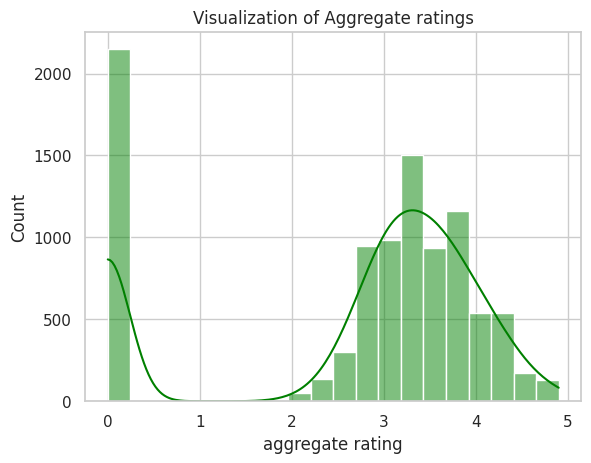

In [ ]:
#visualization of key column
sns.set(style='whitegrid')
sns.histplot(res_data['Aggregate rating'], bins=20, color='green',kde=True)
plt.title('Visualization of Aggregate ratings')
plt.xlabel('aggregate rating')
plt.show()

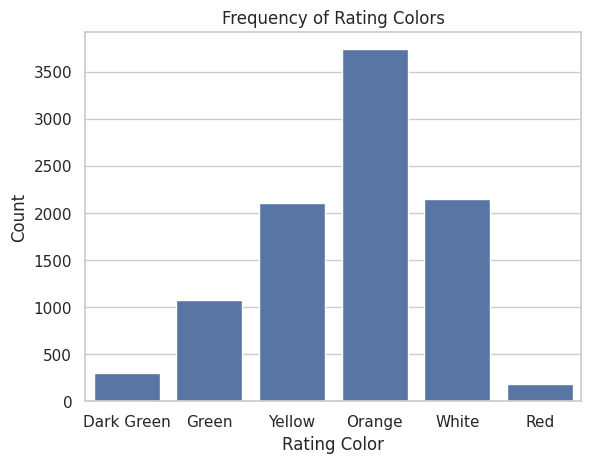

In [ ]:
#to visualize rating color
sns.countplot(x='Rating color', data=res_data)
plt.xlabel('Rating Color')
plt.ylabel('Count')
plt.title('Frequency of Rating Colors')
plt.show()

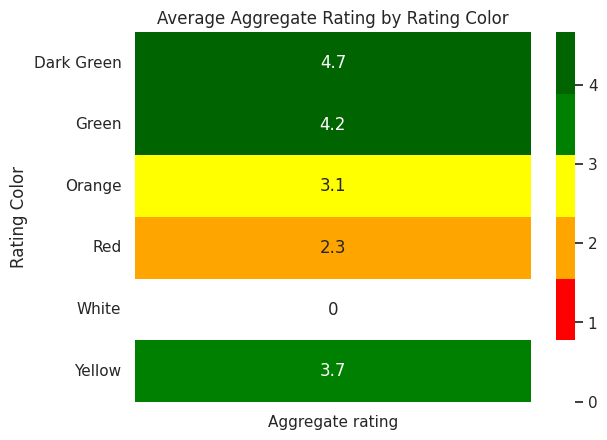

In [ ]:
#to visualize relation between Aggregate rating and Rating color
colors = ['white', 'red', 'orange','yellow', 'green', 'darkgreen']
my_cmap=mcolors.ListedColormap(colors)
sns.heatmap(res_data.groupby('Rating color')['Aggregate rating'].mean().to_frame(), annot=True, cmap=my_cmap)
plt.ylabel('Rating Color')
plt.title('Average Aggregate Rating by Rating Color')
plt.show()

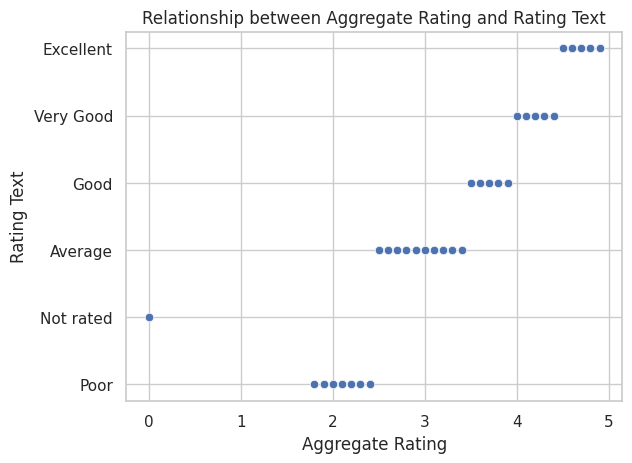

In [ ]:
#visualizing relation between Aggregate rating and rating text
sns.scatterplot(x='Aggregate rating', y='Rating text', data=res_data)
plt.xlabel('Aggregate Rating')
plt.ylabel('Rating Text')
plt.title('Relationship between Aggregate Rating and Rating Text')
plt.show()

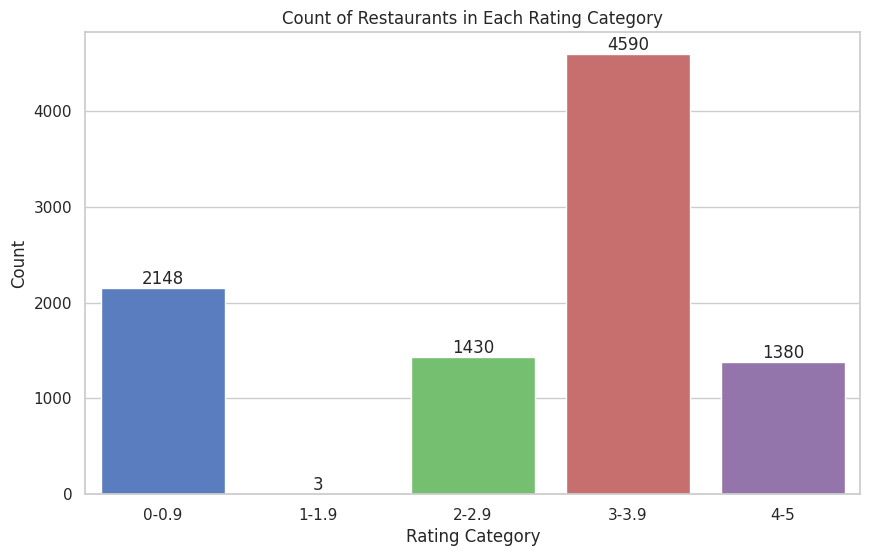

In [ ]:
#visualizing the count of different Aggregate ratings
bin=[0,1,2,3,4,5]
label=['0-0.9','1-1.9','2-2.9','3-3.9','4-5']

range_ratings=pd.cut(res_data['Aggregate rating'],bins=bin,labels=label, right=False,include_lowest=True)
count_ratings=range_ratings.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=count_ratings.index, y=count_ratings.values, hue=count_ratings.index, palette='muted', legend=False)

for i, count in enumerate(count_ratings.values):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

plt.title('Count of Restaurants in Each Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()

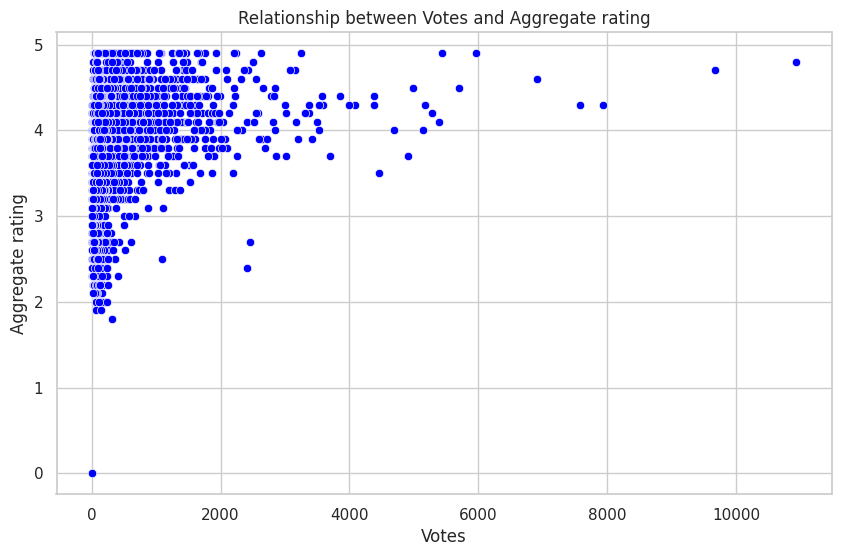

In [ ]:
#visualizing votes v/s Aggregate rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=res_data, color='blue')
plt.title('Relationship between Votes and Aggregate rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.show()

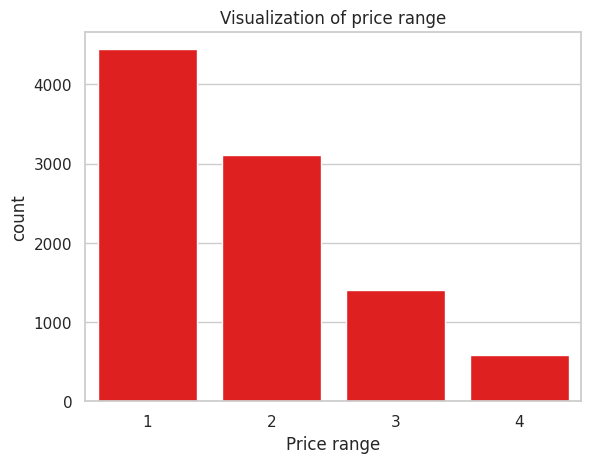

In [ ]:
#visualizing price range
sns.countplot(data=res_data,x='Price range', color='red')
plt.title('Visualization of price range')
plt.xlabel('Price range')
plt.show()

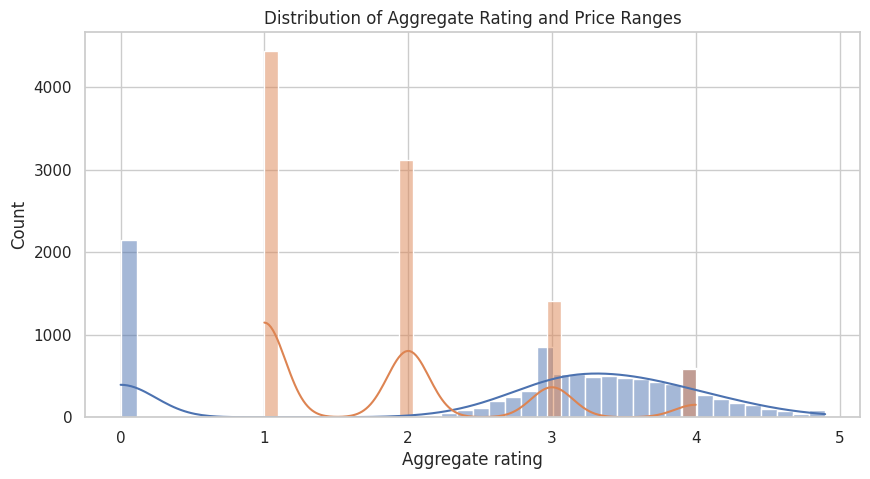

In [ ]:
#Distribution of Aggregate Rating and Price Ranges
plt.figure(figsize=(10, 5))

sns.histplot(x='Aggregate rating', data=res_data, kde=True)
sns.histplot(x='Price range', data=res_data, kde=True)

plt.title('Distribution of Aggregate Rating and Price Ranges')

plt.show()

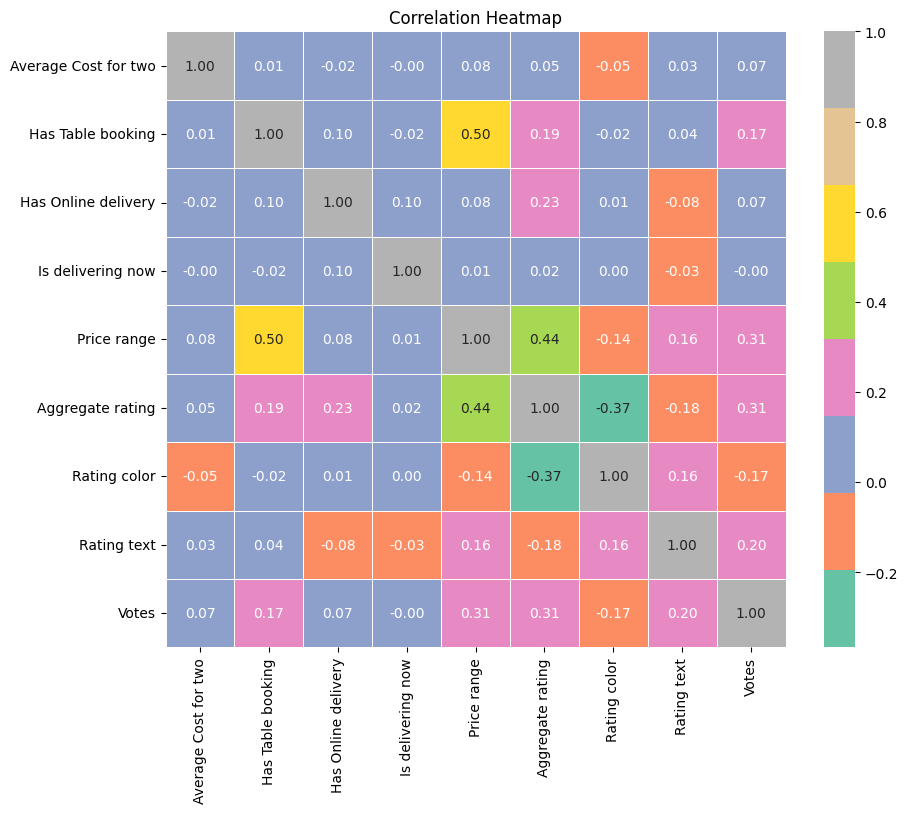

In [ ]:
#1st, building a correlation heatmap
correlation_matrix = res_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Set2', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

4) Data pre-processing

In [ ]:
#handling missing values
res_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#eliminaing insignificant columns
insig_cols=['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Currency','Switch to order menu']
for col in insig_cols:
    if col in res_data.columns:
        res_data.drop(col, axis=1, inplace=True)
res_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Aggregate rating      9551 non-null   float64
 6   Rating color          9551 non-null   object 
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 671.7+ KB


In [ ]:
res_data.isnull().sum()

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
res_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Aggregate rating      9551 non-null   float64
 6   Rating color          9551 non-null   object 
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 671.7+ KB


In [ ]:
res_data.shape

(9551, 9)

In [8]:
for col in res_data.columns:
  print("no. of unique values in",col,':',len(res_data[col].unique()))

no. of unique values in Average Cost for two : 140
no. of unique values in Has Table booking : 2
no. of unique values in Has Online delivery : 2
no. of unique values in Is delivering now : 2
no. of unique values in Price range : 4
no. of unique values in Aggregate rating : 33
no. of unique values in Rating color : 6
no. of unique values in Rating text : 6
no. of unique values in Votes : 1012


In [ ]:
# Display cleaned dataset
print("Cleaned Dataset:")
print(res_data.head())


Cleaned Dataset:
   Average Cost for two Has Table booking Has Online delivery  \
0                  1100               Yes                  No   
1                  1200               Yes                  No   
2                  4000               Yes                  No   
3                  1500                No                  No   
4                  1500               Yes                  No   

  Is delivering now  Price range  Aggregate rating Rating color Rating text  \
0                No            3               4.8   Dark Green   Excellent   
1                No            3               4.5   Dark Green   Excellent   
2                No            4               4.4        Green   Very Good   
3                No            4               4.9   Dark Green   Excellent   
4                No            4               4.8   Dark Green   Excellent   

   Votes  
0    314  
1    591  
2    270  
3    365  
4    229  


In [9]:
#binary encoding 2 class data:
binary_cols=['Has Table booking','Has Online delivery','Is delivering now']
for col in binary_cols:
  if col in res_data.columns:
    res_data[col]=res_data[col].map({'Yes':1,'No':0})

res_data.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,3,4.8,Dark Green,Excellent,314
1,1200,1,0,0,3,4.5,Dark Green,Excellent,591
2,4000,1,0,0,4,4.4,Green,Very Good,270
3,1500,0,0,0,4,4.9,Dark Green,Excellent,365
4,1500,1,0,0,4,4.8,Dark Green,Excellent,229


In [10]:
#converting textual data into numeric data
label_encode=LabelEncoder()
res_data['Rating color']=label_encode.fit_transform(res_data['Rating color'])
res_data['Rating text']=label_encode.fit_transform(res_data['Rating text'])
res_data.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,3,4.8,0,1,314
1,1200,1,0,0,3,4.5,0,1,591
2,4000,1,0,0,4,4.4,1,5,270
3,1500,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,4,4.8,0,1,229


In [ ]:
res_data.shape

(9551, 9)

In [ ]:
print("Final Pre-processed data:",res_data)

Final Pre-processed data:       Average Cost for two  Has Table booking  Has Online delivery  \
0                     1100                  1                    0   
1                     1200                  1                    0   
2                     4000                  1                    0   
3                     1500                  0                    0   
4                     1500                  1                    0   
...                    ...                ...                  ...   
9546                    80                  0                    0   
9547                   105                  0                    0   
9548                   170                  0                    0   
9549                   120                  0                    0   
9550                    55                  0                    0   

      Is delivering now  Price range  Aggregate rating  Rating color  \
0                     0            3               4.8       

5) Model Training

In [11]:
#separating training and testing data

X = res_data.drop('Aggregate rating', axis=1)
y = res_data['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8118, 8)
Shape of X_test: (1433, 8)
Shape of y_train: (8118,)
Shape of y_test: (1433,)


**i) LINEAR REGRESSION**

In [12]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print("mean squared error:",mse)
print("goodness of fit (r2_score):",r2)

mean squared error: 1.3960545046975412
goodness of fit (r2_score): 0.38298442948321476


*OBSERVATIONS*

1)A lower MSE is better. In this case, 1.39 is a relatively high MSE, which means our predictions are not very accurate.

2)A higher R2 score is better. In this case, 0.38 is a relatively low R2 score, which means our model is not explaining much of the variation in the data.

**ii) DECISION TREE REGRESSION**

In [13]:
#splitting data again to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=110)
dt = DecisionTreeRegressor(min_samples_leaf=0.01)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
msedt=mean_squared_error(y_test,y_pred)
r2dt=r2_score(y_test,y_pred)
print("mean squared error:",msedt)
print("goodness of fit (r2_score):",r2dt)

mean squared error: 0.029577433754237676
goodness of fit (r2_score): 0.9870941721648595


*OBSERVATIONS*

1)The MSE is very low, which shows that the Decision Tree is working very well in predicting the outputs, and gives very close predictions to the actual values.

2) The r2 score is extremely high, indicating the almost perfect ability of the model to understand the variance of the data.

**iii) RANDOM FOREST REGRESSION**

In [14]:
#splitting data again to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=135)
rf=RandomForestRegressor(min_samples_split=2,min_samples_leaf=0.01)
rf.fit(X_train,y_train)
y_prf=rf.predict(X_test)
mserf=mean_squared_error(y_test,y_prf)
r2rf=r2_score(y_test,y_prf)
print("mean squared error:",mserf)
print("goodness of fit (r2_score):",r2rf)

mean squared error: 0.029899438297535316
goodness of fit (r2_score): 0.9866987463952218


*OBSERVATIONS*

1) The MSE (0.0299) is very low, but relatively higher at the third decimal place when compared to MSE of Decision Tree Regressor(0.0295) , indicating that the Decision Tree Regressor model is slightly better at predicting the target variable.

2)The Decision Tree Regressor model has a slightly higher R² score (0.9871) compared to the Random Forest Regressor model (0.9867). This suggests that the Decision Tree model is slightly better at explaining the variance in the target variable.

**iv) GRADIENT BOOSTING REGRESSION**

In [15]:
#splitting data again to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=205)
gbr=GradientBoostingRegressor(learning_rate=0.01,min_samples_split=2,min_samples_leaf=0.01)
gbr.fit(X_train,y_train)
y_pgbr=gbr.predict(X_test)
msegbr=mean_squared_error(y_test,y_pgbr)
r2gbr=r2_score(y_test,y_pgbr)
print("mean squared error:",msegbr)
print("goodness of fit (r2_score):",r2gbr)

mean squared error: 0.3449511031556444
goodness of fit (r2_score): 0.8499546151803637


*OBSERVATIONS*

1) The MSE is 0.3449, which suggests that the model is not perfectly accurate, but it's still relatively good. Still, the Decision Tree Regressor is by far the best.

2)The R² score is 0.8499, which suggests that the model explains about 85% of the variance in the target variable, but couldn't beat the performance of Decision Tree Regressor explaining 99% of the variance in data.

**v) XGBOOST**

In [16]:
#splitting data again to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=173)
xgb=XGBRegressor(objective='reg:squarederror',learning_rate=0.01)
xgb.fit(X_train,y_train)
y_pxgb=gbr.predict(X_test)
msexgb=mean_squared_error(y_test,y_pxgb)
r2xgb=r2_score(y_test,y_pxgb)
print("mean squared error:",msexgb)
print("goodness of fit (r2_score):",r2xgb)

mean squared error: 0.33318205616364427
goodness of fit (r2_score): 0.8474474352098853


*OBSERVATIONS*

1)The MSE is 0.3331, which suggests that the model is performing slightly better than the Gradient Boosting Regressor (0.3449),but not the best.

2)The R² score is 0.8474, which suggests that the model explains about 84.7% of the variance in the target variable,slightly lesser than Gradient Boosting Regressor.

**CONCLUSION**

The Decision Tree Regressor model achieves the best results on the dataset, making it the most suitable choice for predicting restaurant ratings.

**MOST INFLUENTIAL FEATURES**

In [17]:
importances = dt.feature_importances_
feature_importances = pd.DataFrame({'Feature': dt.feature_names_in_,
                                    'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))

                Feature  Importance
7                 Votes    0.909882
5          Rating color    0.082549
6           Rating text    0.007204
0  Average Cost for two    0.000224
2   Has Online delivery    0.000091
4           Price range    0.000051
1     Has Table booking    0.000000
3     Is delivering now    0.000000
